# Problem 1

# Wholesale Customers Analysis 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [180]:
wcd=pd.read_csv(r'C:\Users\shubh\Downloads\Wholesale+Customers+Data.csv')

In [181]:
wcd.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [182]:
wcd.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [183]:
wcd.shape

(440, 9)

In [184]:
wcd.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [185]:
wcd.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [186]:
wcd.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [187]:
wcd.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [188]:
wcd_1=wcd.copy()

In [189]:
wcd_1["Total"]=wcd_1["Fresh"]+wcd_1["Milk"]+wcd_1["Grocery"]+wcd_1["Frozen"]+wcd_1["Detergents_Paper"]+wcd_1["Delicatessen"]
wcd_1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [190]:
wcd_2 = wcd_1.groupby(['Region','Channel']).sum().reset_index()
wcd_2

,Region,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,Hotel,14026,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon,Retail,4069,93600,194112,332495,46514,148055,33695,848471
2,Oporto,Hotel,8988,326215,64519,123074,160861,13516,30965,719150
3,Oporto,Retail,5911,138506,174625,310200,29271,159795,23541,835938
4,Other,Hotel,48020,2928269,735753,820101,771606,165990,320358,5742077
5,Other,Retail,16006,1032308,1153006,1675150,158886,724420,191752,4935522


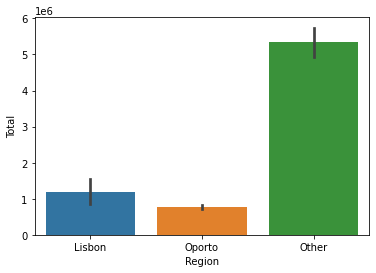

In [191]:
sns.barplot(x="Region",y="Total",data=wcd_2);

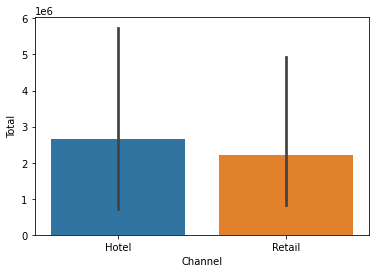

In [192]:
sns.barplot(x="Channel",y="Total",data=wcd_2);

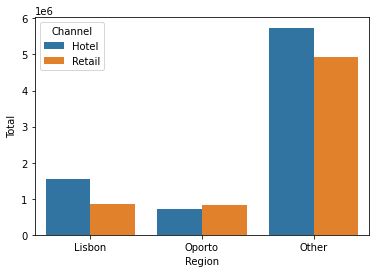

In [193]:
sns.barplot(x="Region",y="Total",data=wcd_2,hue="Channel");

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [195]:
wcd_3=wcd.select_dtypes(exclude=['object'])
wcd_3

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,4,13265,1196,4221,6404,507,1788
4,5,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,436,29703,12051,16027,13135,182,2204
436,437,39228,1431,764,4510,93,2346
437,438,14531,15488,30243,437,14841,1867
438,439,10290,1981,2232,1038,168,2125


In [197]:
wcd_4=wcd.select_dtypes(exclude=['int64'])
wcd_4

,Channel,Region
0,Retail,Other
1,Retail,Other
2,Retail,Other
3,Hotel,Other
4,Retail,Other
...,...,...
435,Hotel,Other
436,Hotel,Other
437,Retail,Other
438,Hotel,Other


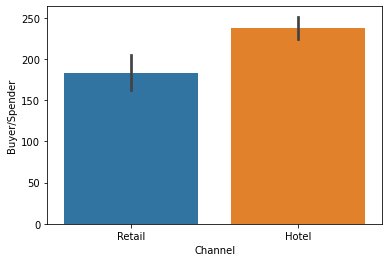

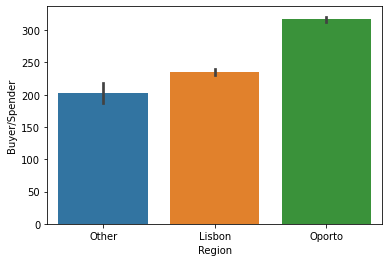

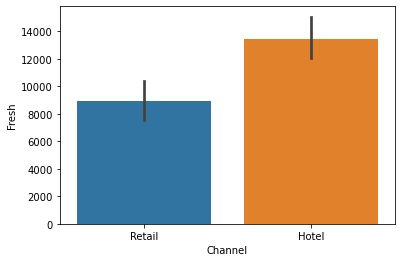

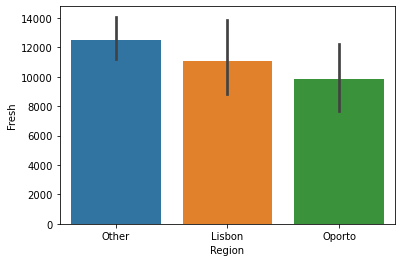

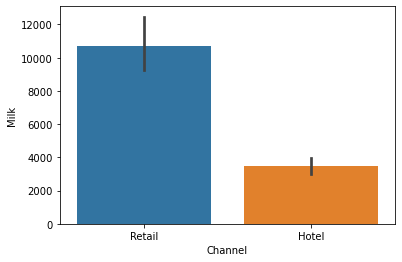

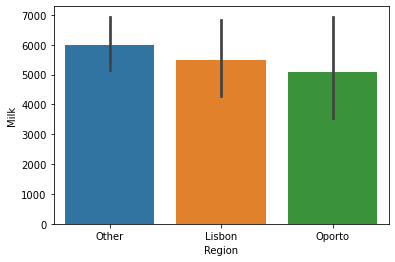

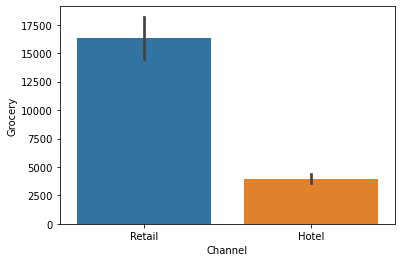

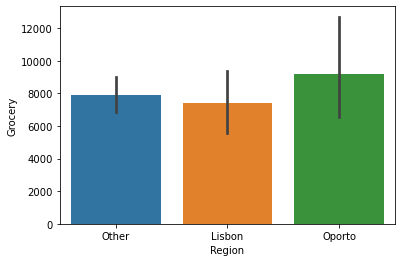

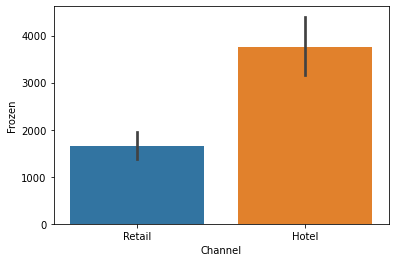

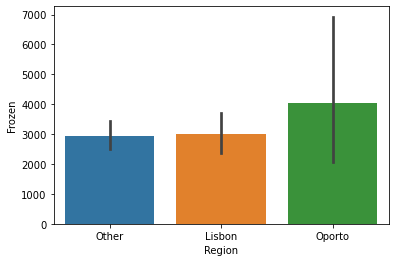

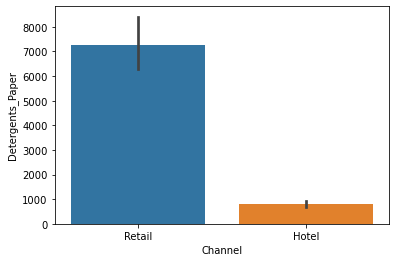

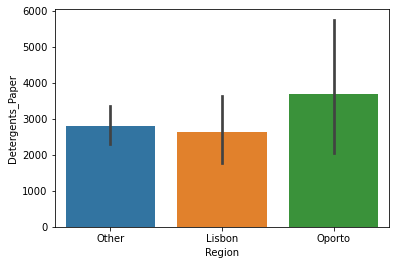

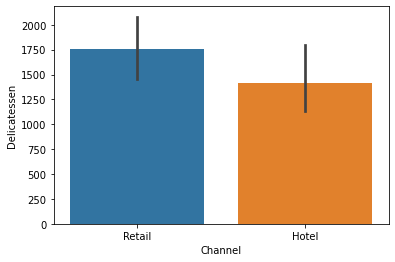

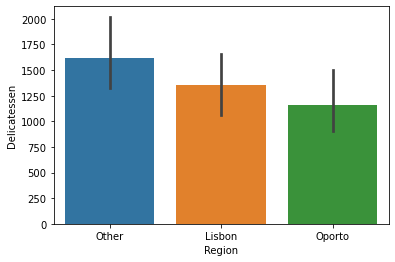

In [199]:
for i in wcd_3[1:]:
    for j in wcd_4[1:]:
        sns.barplot(y=wcd[i],x=wcd[j]);
        plt.show()

In [202]:
wcd_7 = wcd.drop(columns="Buyer/Spender",axis =1)
wcd_7

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [203]:
wcd_8= wcd_7.groupby('Region').sum()
wcd_8

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


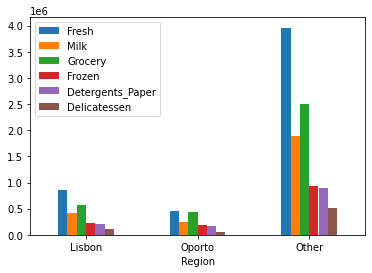

In [204]:
wcd_8.plot.bar(rot=0);

In [205]:
wcd_9= wcd_7.groupby('Channel').sum()
wcd_9

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


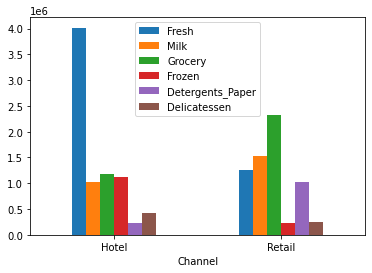

In [206]:
wcd_9.plot.bar(rot=0);

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [207]:
wcd_1.std()

C:\Users\shubh\AppData\Local\Temp/ipykernel_21636/3499952830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wcd_1.std()


Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total               26356.301730
dtype: float64

In [210]:
wcd_5=wcd_1.quantile(0.25)
wcd_5

Buyer/Spender         110.75
Fresh                3127.75
Milk                 1533.00
Grocery              2153.00
Frozen                742.25
Detergents_Paper      256.75
Delicatessen          408.25
Total               17448.75
Name: 0.25, dtype: float64

In [211]:
wcd_6=wcd_1.quantile(0.75)
wcd_6

Buyer/Spender         330.25
Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicatessen         1820.25
Total               41307.50
Name: 0.75, dtype: float64

In [212]:
IQR =wcd_6-wcd_5
IQR

Buyer/Spender         219.50
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
Total               23858.75
dtype: float64

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

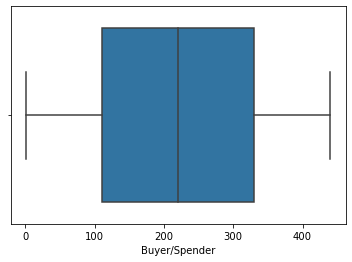

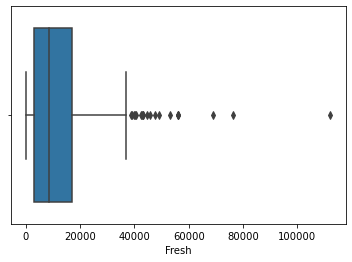

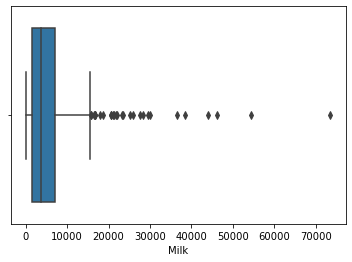

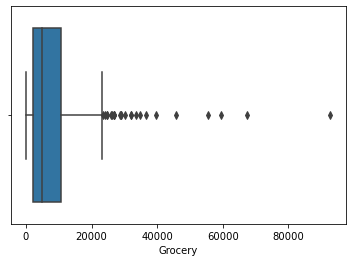

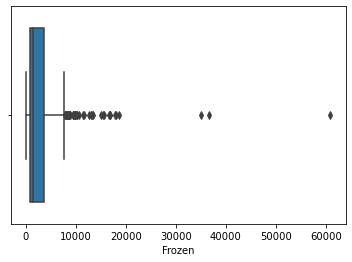

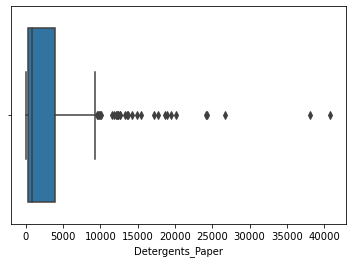

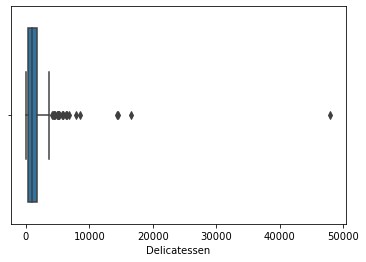

In [213]:
for i in wcd_3[1:]:
    sns.boxplot(x=wcd[i]);
    plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [4]:
df=pd.read_csv(r'C:\Users\shubh\Downloads\Survey-1.csv')

In [5]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [8]:
df.shape

(62, 14)

In [10]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

# Problem 2

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

# 2.1.1. Gender and Major

In [12]:
pd.crosstab(df.Gender, df.Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# 2.1.2. Gender and Grad Intention 

In [16]:
pd.crosstab(df.Gender, df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


# 2.1.3. Gender and Employment

In [17]:
pd.crosstab(df.Gender, df.Employment)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# 2.1.4. Gender and Computer

In [18]:
pd.crosstab(df.Gender, df.Computer)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [42]:
No_of_male= (df['Gender'] =='Male').sum()
print(No_of_male)
No_of_Female= (df['Gender'] =='Female').sum()
print(No_of_Female)
Total_value= df['Gender'].value_counts().sum()
print(Total_value)

29
33
62


In [46]:
Prob_male=(No_of_male/Total_value)*100
print(('The probability that a randomly selected CMSU student will be male'), Prob_male)

The probability that a randomly selected CMSU student will be male 46.774193548387096


# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [63]:

Prob_female=(No_of_Female/Total_value)*100
print(('The probability that a randomly selected CMSU student will be female'),Prob_female)


The probability that a randomly selected CMSU student will be female 53.2258064516129


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [67]:
pd.crosstab(df['Gender'],df['Major'],margins=True,normalize='index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 



In [70]:
df['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [71]:
df.groupby(['Gender', 'Grad Intention']).size()

Gender  Grad Intention
Female  No                 9
        Undecided         13
        Yes               11
Male    No                 3
        Undecided          9
        Yes               17
dtype: int64

In [72]:
pd.crosstab(df.Gender, df['Grad Intention'],margins = True,normalize='index')

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207
All,0.193548,0.354839,0.451613


In [73]:
df['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [74]:
df.groupby(['Gender', 'Computer']).size()

Gender  Computer
Female  Desktop      2
        Laptop      29
        Tablet       2
Male    Desktop      3
        Laptop      26
dtype: int64

In [75]:
pd.crosstab(df.Gender, df['Computer'],margins = True,normalize='index')

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.060606,0.878788,0.060606
Male,0.103448,0.896552,0.000000
All,0.080645,0.887097,0.032258


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [76]:
df['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [77]:
No_of_fulltime_emp = (df['Employment'] =='Full-Time').sum()
No_of_fulltime_emp

10

In [78]:
No_male_fulltime_emp = ((df['Employment'] =='Full-Time') & (df['Gender'] =='Male')).sum()
No_male_fulltime_emp

7

In [79]:
df.groupby(['Gender', 'Employment']).size()

Gender  Employment
Female  Full-Time      3
        Part-Time     24
        Unemployed     6
Male    Full-Time      7
        Part-Time     19
        Unemployed     3
dtype: int64

In [80]:
p_of_male_stu =No_of_male/Total_value
print(round((p_of_male_stu), 4)*100)
p_of_fulltime_emp =No_of_fulltime_emp/Total_value
print(round((p_of_fulltime_emp), 4)*100)
p_of_male_fulltime_emp = No_male_fulltime_emp/Total_value
print(round((p_of_male_fulltime_emp), 4)*100)

46.77
16.13
11.29


In [81]:
p = p_of_male_stu+p_of_fulltime_emp-p_of_male_fulltime_emp
print(' The probability that a randomly chosen student is either a male or has full-time employment', p*100 ,'%')

 The probability that a randomly chosen student is either a male or has full-time employment 51.61290322580645 %


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [94]:
(df['Major'].value_counts())
(df.groupby(['Gender', 'Major']).size())
val_1 = (df['Gender']=='Female').sum()
val_2 = ((df['Gender']=='Female') & (df['Major'] == 'International Business')).sum()
val_3 = ((df['Gender']=='Female') & (df['Major'] == 'Management')).sum()
val_4 = val_2 + val_3
val_4

print('Probability that given a female student is randomly chosen, she is majoring in international business or management',round((val_4/val_1)*100))
       

Probability that given a female student is randomly chosen, she is majoring in international business or management 24


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [95]:
df[df['Grad Intention'] == 'Undecided'].index
df_cont = df.drop(df[df['Grad Intention'] == 'Undecided'].index)
df_cont.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [96]:
pd.crosstab(df['Gender'] , df_cont['Grad Intention'] ,margins =True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [97]:
pd.crosstab(df['Gender'] , df_cont['Grad Intention'] ,margins =True,normalize='index')

Grad Intention,No,Yes
Gender,,
Female,0.45,0.55
Male,0.15,0.85
All,0.30,0.70


In [98]:
 print('The probability that a randomly selected Student is Female',(20/40)*100)

The probability that a randomly selected Student is Female 50.0


In [99]:
val2 = ((df['Gender']=='Female') & (df_cont['Grad Intention'] == 'Yes')).sum()
print('The probability that a randomly selected student is female and intends to graduate',(val2/20)*100, '%' )
print('They are not independent events')

The probability that a randomly selected student is female and intends to graduate 55.00000000000001 %
They are not independent events


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.


# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3? 

In [106]:
No_of_stud_less = (df['GPA'] < 3).sum()
print(No_of_stud_less)
print(Total_value)

17
62


In [101]:
No_of_stud_less = (df['GPA'] < 3).sum()
p_of_stud_less =No_of_stud_less/Total_value
print('The probability that his/her GPA is less than 3 is', (p_of_stud_less)*100, '%')

The probability that his/her GPA is less than 3 is 27.419354838709676 %


# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more. 

In [102]:
((df['Gender']=='Male') & (df['Salary'] >= 50)).sum()

14

In [103]:
pd.crosstab((df['Gender']=='Male'), (df['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759


In [104]:
((df['Gender']=='Female') & (df['Salary'] >= 50)).sum()

18

In [105]:
pd.crosstab((df['Gender']=='Female'), (df['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


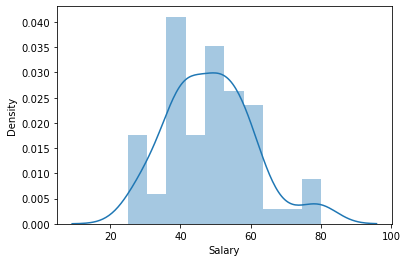

In [107]:
sns.distplot(df['Salary'], bins = 10, kde=True, rug= False);

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


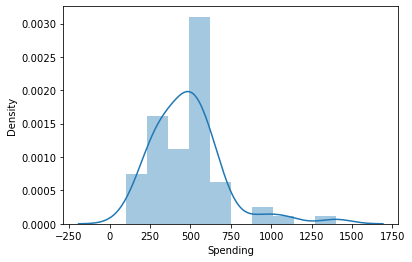

In [108]:
sns.distplot(df['Spending'], bins = 10, kde=True, rug= False);

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


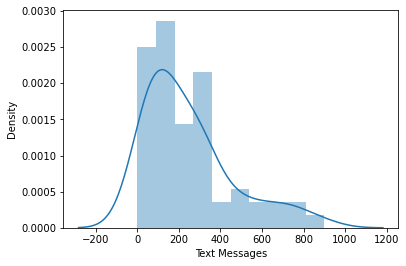

In [109]:
sns.distplot(df['Text Messages'], bins = 10, kde=True, rug= False);

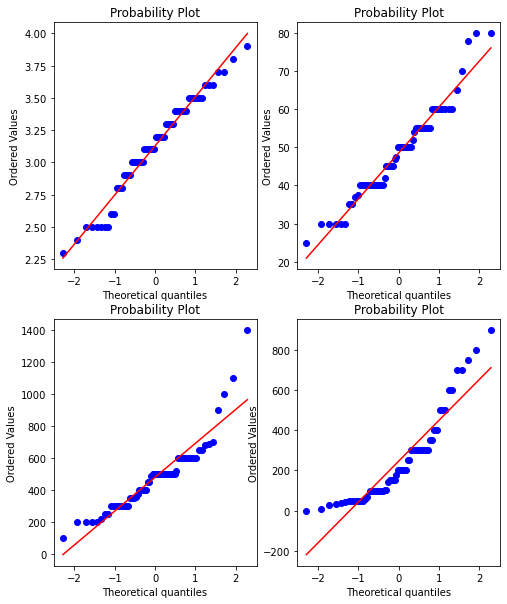

In [110]:
plt.figure(figsize=[8, 10])

plt.subplot(2, 2, 1)
stats.probplot(df['GPA'], plot=plt);


plt.subplot(2, 2, 2)
stats.probplot(df['Salary'], plot=plt);



plt.subplot(2, 2, 3)
stats.probplot(df['Spending'], plot=plt);



plt.subplot(2, 2, 4)
stats.probplot(df['Text Messages'], plot=plt);

plt.show()


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946
skew value of Spending is 1.5859147414045331
skew value of Text Message is 1.2958079731054333


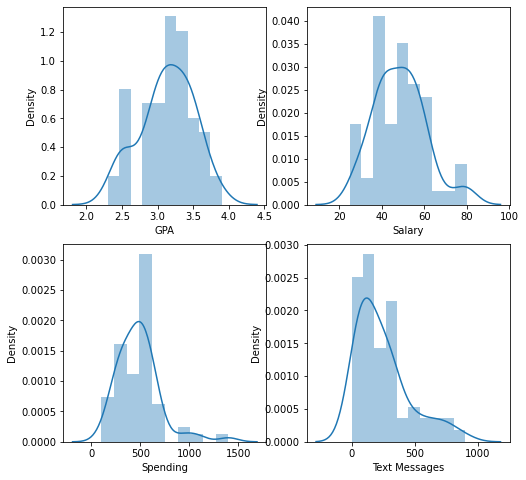

In [138]:
plt.figure(figsize=[8, 8])

plt.subplot(2, 2, 1)
sns.distplot(df['GPA'], bins = 10, kde=True, rug= False);
print('skew value of GPA is', df['GPA'].skew())

plt.subplot(2, 2, 2)
sns.distplot(df['Salary'], bins = 10, kde=True, rug= False);
print('skew value of Salary is', df['Salary'].skew())


plt.subplot(2, 2, 3)
sns.distplot(df['Spending'], bins = 10, kde=True, rug= False);
print('skew value of Spending is', df['Spending'].skew())


plt.subplot(2, 2, 4)
sns.distplot(df['Text Messages'], bins = 10, kde=True, rug= False);
print('skew value of Text Message is', df['Text Messages'].skew())


# Problem 3 

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [221]:
ab=pd.read_csv(r'C:\Users\shubh\Downloads\A+&+B+shingles.csv')

In [222]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [223]:
ab.shape

(36, 2)

In [225]:
ab.isnull().sum()

A    0
B    5
dtype: int64

In [227]:
ab.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [228]:
ab.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


# Problem 3
# Q-3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [249]:
from scipy import stats
from scipy.stats import ttest_1samp
t_a, p_value_a  =  stats.ttest_1samp(ab.A, 0.35)
print(t_a, p_value_a)

-1.4735046253382782 0.14955266289815025


In [250]:
P_a = p_value_a / 2
print(P_a)


0.07477633144907513


In [252]:
t_b, p_value_b  =  stats.ttest_1samp(ab.B, 0.35,nan_policy='omit')
print(t_b, p_value_b)

-3.1003313069986995 0.004180954800638365


In [253]:
P_b = p_value_b / 2
print(P_b)

0.0020904774003191826


In [ ]:
# pvalue (0.0021)is less than level of significance(0.05)
# hence we reject H0 mean moisture content is <=0.35 

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [266]:
from scipy.stats import ttest_ind
A = ab['A']
B = ab['B']

ttest,pval = ttest_ind(A,B,nan_policy='omit')
print("t stat",ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we failed to reject null hypothesis")

t stat 1.2896282719661123
p-value 0.2017496571835306
we failed to reject null hypothesis


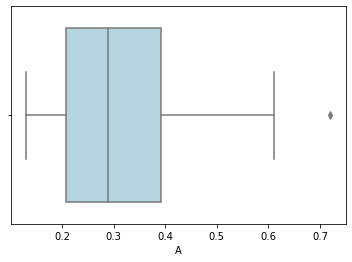

In [258]:
sns.boxplot(x= ab['A'], color='lightblue')
plt.show()

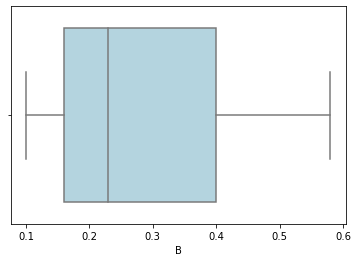

In [263]:
sns.boxplot(x= ab['B'], color='lightblue')
plt.show()